
<style>
.center {
    text-align: center;
}
</style>

<div class="center">
   <h3>Performance Ratio Evolution</h3> 
   <h2>Cleantech Solar – Internship Assignment</h2>
</div>

- Authored by: Rohit Kumar Das
---
    


1. #### Introduction
    To perform performance ratio analysis on the cleantech solar system we have the following data:
    * Assignment Dataset
    * Initial Target Budget PR = 73.9
    * Rate of Change of Target Budget PR = 0.8% per year




###### Dataset: 
The dataset needed for the creation of this graph has been provided. It consists of three columns:
* Date (July 2019 to present)
* PR (Performance Ratio) – This parameter is used to track the daily performance of the PV plant. A high value indicates that the plant is performing well and there are no issues. 
* GHI (Irradiation) – This parameter tracks the total irradiation for a particular day. A high value indicates a sunny day.




In [508]:
import pandas as pd

original_df = pd.read_excel('Assignment_dataset.xlsx')
original_df.head()

,Date,GHI,PR
0,2019-07-01,3.256608,69.575676
1,2019-07-02,3.976767,79.314411
2,2019-07-03,2.811867,61.020006
3,2019-07-04,3.658408,83.262576
4,2019-07-05,5.590683,82.124440


-----
2. Problem Statement

Important Notes:
* To plot a red line on the graph, which represents the 30-days moving average of the PR (Performance Evolution) 
    whereas the scatter points depict the GHI. 

* To plot a dark green line, which represents the budget line. The value begins from 73.9 and should reduce by 
    0.8% every year.As you can see the, the values are:

    - 73.9 for the first year (July 2019 to June 2020)
    - 73.3 for the second year (July 2020 to June 2021)
    - 72.7 for the third year (July 2021 to present)
* To plot a color coded scatter plot.
* The points for the scatter plot are colour coded (as per the legend above). That is: if the GHI [Daily Irradiation] is:

    - Less than 2: <span style="color:navy">Navy Blue</span>.
    - 2-4: <span style="color:#ADD8E6">Light blue</span>.
    - 4-6: <span style="color:orange">Orange</span>.
    - greater than 6: <span style="color:brown">Brown</span>.

* The points above Target Budget PR are representing the number of PR points above the Budget PR for that particular year.

* The bottom right section of the graph is simply showing the average PR for the last 7 days, the last 30 days, last
     60 days and so  on. 
---




3. Solution

Changing date to datetime format for convienience.


```python

In [509]:
from datetime import datetime
df = original_df.copy()
df['Date'] = df['Date'].apply(lambda x: x.to_pydatetime())
# df['Date'] = df['Date'].apply(lambda x: x.strftime('%Y-%b-%d'))

df.head()

,Date,GHI,PR
0,2019-07-01,3.256608,69.575676
1,2019-07-02,3.976767,79.314411
2,2019-07-03,2.811867,61.020006
3,2019-07-04,3.658408,83.262576
4,2019-07-05,5.590683,82.124440


Calculating the Simple Moving Average for the dataset.
- A simple moving average tells us the unweighted mean of the previous K data points. The more the value of K the more smooth is the curve, but increasing K decreases accuracy. If the data points are p1,  p2, . . . , pn then we calculate the simple moving average.

$SMA_k =  \frac{p_{n-k+1} + p_{n-k+2}+ ... + p_n}{k}$

$SMA_k = \frac{1}{k}\sum_{i=n-k+1}^{n} (p_i)$ 



In [510]:
df['SMA30']=df['PR'].rolling(window=30).mean()
df.tail()

,Date,GHI,PR,SMA30
977,2022-03-20,4.226183,81.632738,71.181262
978,2022-03-21,3.431675,71.057353,70.789540
979,2022-03-22,3.580492,81.631509,71.231840
980,2022-03-23,4.997617,71.906149,71.249772
981,2022-03-24,5.125050,79.911798,71.855995


Calculating Target Budget PR:
+ Initial Target Budget PR = 73.9
+ Rate of Change of Target Budget PR = 0.8% (decreases)per year

In [511]:
def get_budget_rate(initial,year):
    if(year==0):
        return initial
    
    return get_budget_rate(initial-initial*.008,year-1)

round(get_budget_rate(73.9,2),1)

72.7

In [512]:
budget_rate=[]
for i in df['Date']:
    if i<datetime.strptime('2020-07-01', '%Y-%m-%d'):
        budget_rate.append(round(get_budget_rate(73.9,0),1))
    elif i<datetime.strptime('2021-07-01', '%Y-%m-%d'):
        budget_rate.append(round(get_budget_rate(73.9,1),1))
    else:
        budget_rate.append(round(get_budget_rate(73.9,2),1))
budget_rate[-10:-1]

[72.7, 72.7, 72.7, 72.7, 72.7, 72.7, 72.7, 72.7, 72.7]

In [513]:
df['Target Budget PR']=pd.Series(budget_rate).values
df

,Date,GHI,PR,SMA30,Target Budget PR
0,2019-07-01,3.256608,69.575676,NaN,73.9
1,2019-07-02,3.976767,79.314411,NaN,73.9
2,2019-07-03,2.811867,61.020006,NaN,73.9
3,2019-07-04,3.658408,83.262576,NaN,73.9
4,2019-07-05,5.590683,82.124440,NaN,73.9
...,...,...,...,...,...
977,2022-03-20,4.226183,81.632738,71.181262,72.7
978,2022-03-21,3.431675,71.057353,70.789540,72.7
979,2022-03-22,3.580492,81.631509,71.231840,72.7
980,2022-03-23,4.997617,71.906149,71.249772,72.7


In [514]:
points_above_target = df[df['PR']>df['Target Budget PR']]['PR'].count()
total_points = len(df)
perc_points_above_target =( points_above_target/total_points) *100

Calculating the Average PR for the last 7 days, last 30 days, last 60 days and so on.

In [515]:
from datetime import datetime, date, timedelta

date=df['Date'][len(df)-1]

date

Timestamp('2022-03-24 00:00:00')

In [516]:
last_7_d = date+ timedelta(days=-7)
last_30_d = date+ timedelta(days=-30)
last_60_d = date+ timedelta(days=-60)
last_90_d = date+ timedelta(days=-90)
last_365_d = date+ timedelta(days=-365)
avg_last_7_d=round(df[df['Date'] > last_7_d]['PR'].mean(),2)
avg_last_30_d= round(df[df['Date'] > last_30_d]['PR'].mean(),2)
avg_last_60_d= round(df[df['Date'] > last_60_d]['PR'].mean(),2)
avg_last_90_d= round(df[df['Date'] > last_90_d]['PR'].mean(),2)
avg_last_365_d= round(df[df['Date'] > last_365_d]['PR'].mean(),2)
avg_lifetime= round(df['PR'].mean(),2)
print(avg_last_7_d,avg_last_30_d,avg_last_60_d,avg_last_90_d,avg_last_365_d,avg_lifetime)


73.8 71.86 73.01 73.05 72.58 72.65


Preparing the c and cmap fro Scatter Plot.

```python

In [517]:
import matplotlib.colors as colors

c=[]
# Less than 2: Navy blue
# 2-4: Light blue
# 4-6: Orange
# >6: Brown

for i in df['GHI']:
    if i<2:
        c.append(0)
    elif i<4:
        c.append(1)
    elif i<6:
        c.append(2)
    else:
        c.append(3)
cmap= colors.ListedColormap(['navy', 'lightblue', 'orange', 'brown'])

Preparing labels for the graph.

```python

In [518]:
label1 ='Target Budget Yield Performance Ratio [1Y-73.9%, 2Y-73.3%, 3Y-72.7%]'
label2 = '30-d moving average of PR'
label3 ='Points above Target Budget PR = {0}/{1} = {2:.2f}%'.format(points_above_target,total_points,perc_points_above_target)
print(label1)
print(label2)
print(label3)

Target Budget Yield Performance Ratio [1Y-73.9%, 2Y-73.3%, 3Y-72.7%]
30-d moving average of PR
Points above Target Budget PR = 476/982 = 48.47%


In [519]:
l_7 = 'Average PR last 7-d: {0:.2f} %'.format(avg_last_7_d)
l_30 = 'Average PR last 30-d: {0:.2f} %'.format(avg_last_30_d)
l_60 = 'Average PR last 60-d: {0:.2f} %'.format(avg_last_60_d)
l_90 = 'Average PR last 90-d: {0:.2f} %'.format(avg_last_90_d)
l_365 = 'Average PR last 365-d: {0:.2f} %'.format(avg_last_365_d)
l_lifetime = 'Average PR Lifetime: {0:.2f} %'.format(avg_lifetime)
final_label = '{0}\n{1}\n{2}\n{3}\n{4}'.format(l_7,l_30,l_60,l_90,l_365)


In [520]:
df_3m= df.groupby( pd.Grouper(key='Date', freq='3M'))['PR'].mean()
index =[]
for i in df_3m.index:
    index.append(i.strftime('%Y-%b'))
index


['2019-Jul',
 '2019-Oct',
 '2020-Jan',
 '2020-Apr',
 '2020-Jul',
 '2020-Oct',
 '2021-Jan',
 '2021-Apr',
 '2021-Jul',
 '2021-Oct',
 '2022-Jan',
 '2022-Apr']

4. Visualization

```python

Putting Everything togher in the graph

<class 'numpy.ndarray'>
<class 'matplotlib.text.Text'>


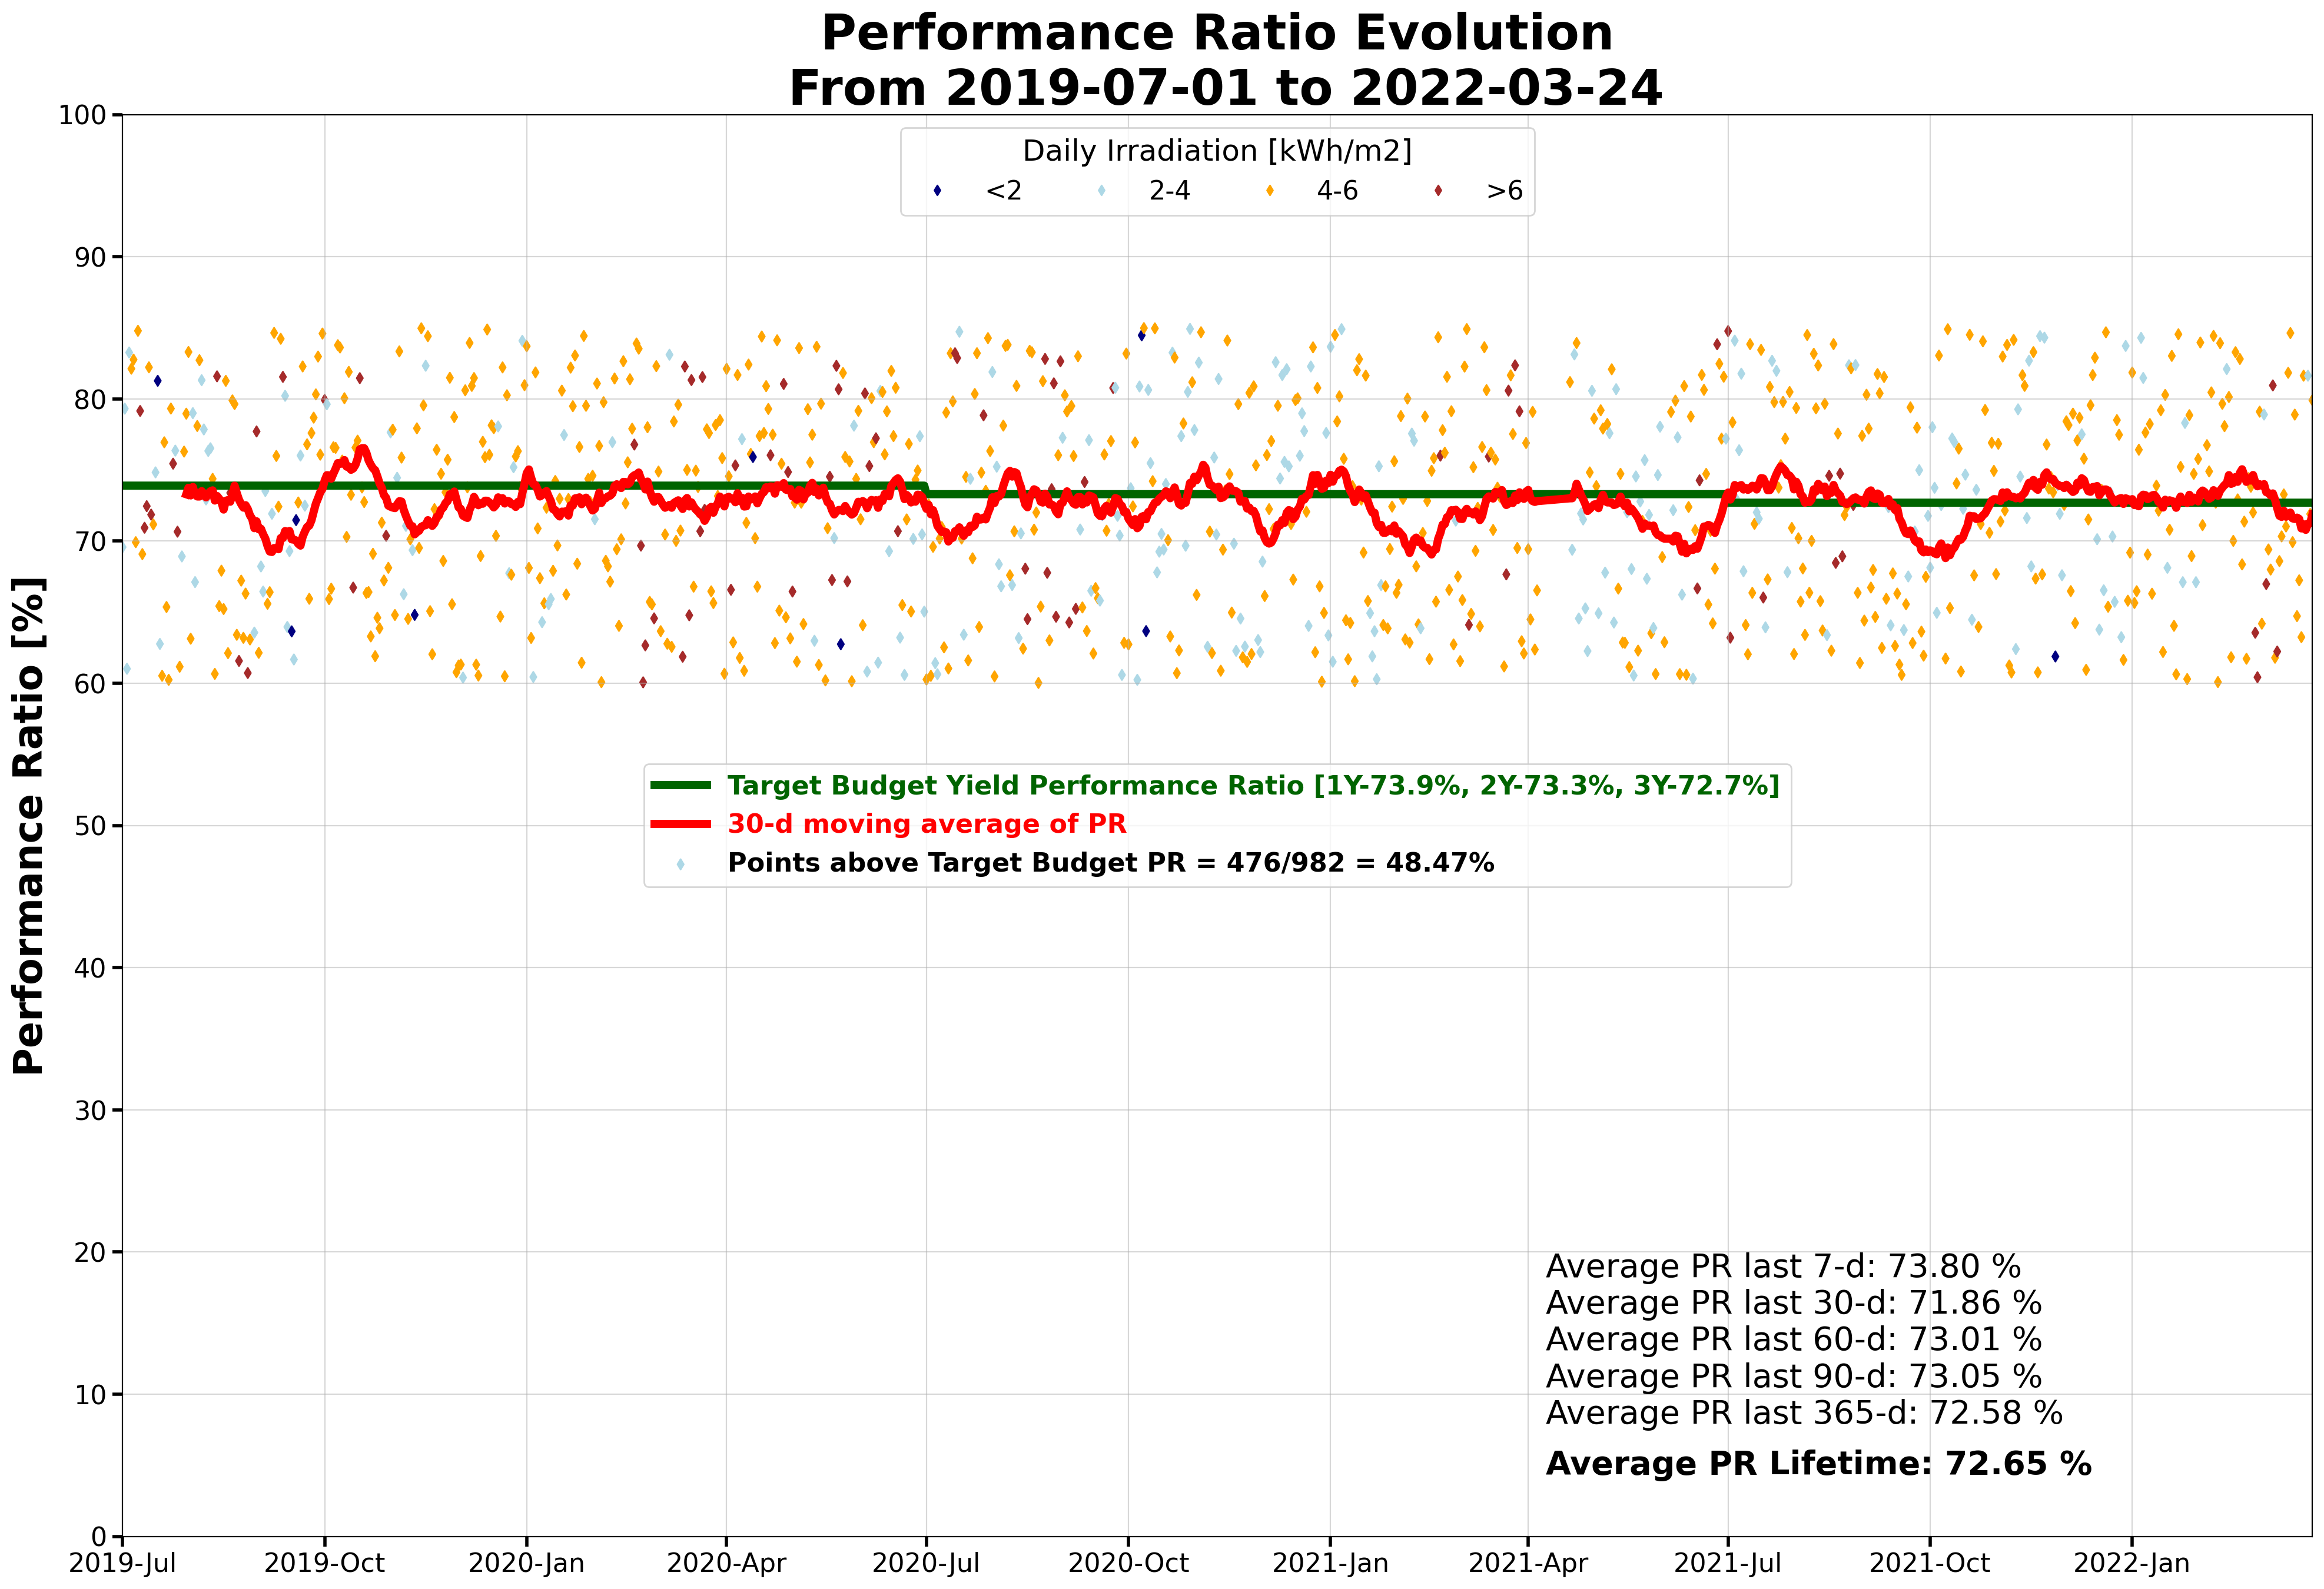

In [521]:
import matplotlib.pyplot as plt
from matplotlib.legend import Legend
import matplotlib.patches as mpatches
from matplotlib.text import Text
import numpy as np
# set figure to 24,18 dpi 200
fig, ax = plt.subplots(figsize=(24, 16), dpi=200)
ax.tick_params(direction='out', length=6, width=2, colors='black',
                grid_alpha=0.5, labelsize=16)


ax.plot(df['Date'], df['Target Budget PR'], color='darkgreen', linewidth=5, )
ax.plot(df['Date'], df['SMA30'], color='red', linewidth=5,)
scatter= ax.scatter(df['Date'], df['PR'], c=c, cmap=cmap, marker='d', s=20, )
ax.text(.65, .2, final_label, transform=ax.transAxes,
        fontsize=20, verticalalignment='top')
ax.text(.65, 0.061, l_lifetime, transform=ax.transAxes,
        fontsize=20, verticalalignment='top', weight='bold')
ax.legend([label1, label2, label3], loc='center',
          labelcolor=['darkgreen', 'red', 'black'],  prop={'weight': 'bold', 'size': 16})
# produce a legend with the unique colors from the scatter
legend1 = Legend(ax,*scatter.legend_elements(),
                    loc=9, title="Daily Irradiation [kWh/m2]",ncol=5, prop={'size': 16})
legend1.get_title().set_fontsize('18')
legend1.get_texts()[0].set_text('<2')
legend1.get_texts()[1].set_text('2-4')
legend1.get_texts()[2].set_text('4-6')
legend1.get_texts()[3].set_text('>6')
ax.add_artist(legend1)
ax.set_ylim(0, 100)

plt.title('Performance Ratio Evolution\n From 2019-07-01 to 2022-03-24', fontsize=30, weight='bold')
plt.ylabel('Performance Ratio [%]', fontsize=24, weight='bold')
#plt.gcf().autofmt_xdate()
plt.autoscale(tight=True, axis='x')
plt.yticks(np.arange(0, 101, 10))
lablesy =[]
pos,label =plt.xticks()
print(type(pos))
print(type(label[0]))
for i in range(len(pos)):
    lablesy.append(Text(x=0, y=0, text=index[i], fontsize=16, weight='bold'))
plt.xticks(pos,lablesy)
        
plt.grid(True)
plt.savefig('performance_ratio_evolution.jpg', dpi=200)
plt.show()


-----
5. Conclusion

+ After analyzing the data, we can conclude that the PV plant is working fine but the target budget is not being met consistently.




```python


Concepts Used:
+ Data Frames in pandas
+ Numpy
+ Plotting with Matplotlib
+ SMA
+ Analysis of Data
+ Visualization
+ Documentation
------

REFERENCES:
1. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html
2. https://www.geeksforgeeks.org/numpy-array-python/
3. https://matplotlib.org/3.1.1/api/pyplot_api.html
4. https://www.geeksforgeeks.org/simple-moving-average-in-python/
5. https://www.geeksforgeeks.org/moving-average-using-python/
6. https://stackoverflow.com/questions/23037548/change-main-plot-legend-label-text
7. https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/scatter_with_legend.html

---------------------------------------------------------------------------------------------------------------------

